# Basis Expansion

Popular linear models for [classification](https://towardsdatascience.com/linear-classifiers-an-overview-e121135bd3bb) and [regression](https://towardsdatascience.com/a-comparison-of-shrinkage-and-selection-methods-for-linear-regression-ee4dd3a71f16) express the expected target as a linear function of the features. This approximation is a convenient and sometimes a necessary one. Convenient, as linear models are easy to interpret and necessary, as with scarce data linear models might be all we can fit to it without overfitting. However, the true underlying function will typically not be linear. Capturing this nonlinearity in the model might, therefore, yield more predictive and explanatory power. A class of modelling approaches address this issue by augmenting the input features $X$ with some transformations and then use the transformed features in linear models. Such models take the form



<p align="center">
<img src="img/basis_expansion.png" width=200 style="display: block; margin: auto;" />
</p>

called **linear basis expansion in X**, where $h_m$ is the m-th transformation of $X$. The beauty of this approach is that once the basis functions $h$ have been determined, the models are linear in these new, transformed variables, and the fitting is as simple as with basic linear models.

Some widely used basis functions are:

* $h_m(X) = X_m$, which recovers the original linar model;
* $h_m(X) = X_j^2$ or $h_m(X) = X_j X_k$, which allow to augment the inputs with polynomial terms to achieve higher-order Taylor expanions;
* $h_m(X) = log(X_j), sqrt(X_j)$ and others, which allow for other nonlinear transformations;
* $h_m(X) = I(L_m < X_k < U_m)$, which is an indicator for region of $X_k$. By braking the range of $X_k$ into a set of non-overlapping regions we obtain a model with piecewise-linear contributions of $X_k$.

# Piecewise Polynomials

A **piecewise polynomial funcion** is obtained by dividing the domain of $X$ into contiguous intervals and representing the function by a separate polynomial in each interval. The code chunk below fits some simple piecewise polynomials to simulated data.

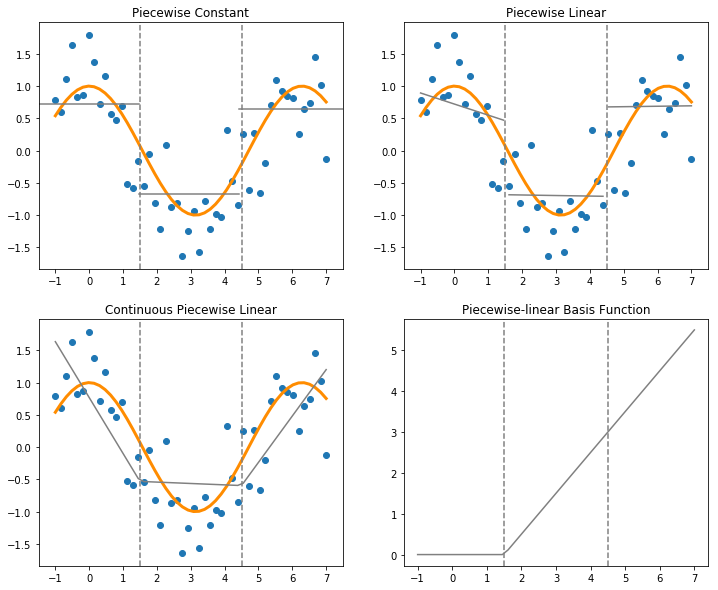

In [9]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
np.random.seed(42)

# Axes limits and knots
x_min, x_knot_1, x_knot_2, x_max = -1, 1.5, 4.5, 7

# Points generated from a cosine function with normal noise
x_true = scipy.linspace(x_min, x_max,50)
y_true = scipy.cos(x_true)
y_obs = y_true + np.random.normal(scale=0.5, size=len(x_true))

# Get x-y coordinates per region
x_region_1 = x_true[x_true <= x_knot_1]
x_region_2 = x_true[(x_knot_1 < x_true) & (x_true < x_knot_2)]
x_region_3 = x_true[x_true >= x_knot_2]
y_region_1 = y_true[x_true <= x_knot_1]
y_region_2 = y_true[(x_knot_1 < x_true) & (x_true < x_knot_2)]
y_region_3 = y_true[x_true >= x_knot_2]

# Piecewise constant fit ------------------------------------------------
# Plot cosine line and noisy data
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.plot(x_true, y_true, linewidth=3, c='darkorange')
plt.scatter(x_true, y_obs)
# Plot knots
plt.axvline(x=x_knot_1, c='gray', ls='--')
plt.axvline(x=x_knot_2, c='gray', ls='--')
# Plot piecewise constant fits
plt.axhline(y=y_region_1.mean(), c='gray', xmin=0, xmax=0.33)
plt.axhline(y=y_region_2.mean(), c='gray', xmin=0.33, xmax=0.66)
plt.axhline(y=y_region_3.mean(), c='gray', xmin=0.66, xmax=1)
plt.title('Piecewise Constant')


# Piecewise linear fit --------------------------------------------------
# Calculate OLS coefficients from regression anatomy
beta_region_1 = ((y_region_1 - y_region_1.mean()).dot(x_region_1) / 
                (x_region_1**2).sum())
beta_region_2 = ((y_region_2 - y_region_2.mean()).dot(x_region_2) / 
                (x_region_2**2).sum())
beta_region_3 = ((y_region_3 - y_region_3.mean()).dot(x_region_3) / 
                (x_region_3**2).sum())

# Calculate regression fitted values
y_hat_region_1 = beta_region_1 * x_region_1 + y_region_1.mean()
y_hat_region_2 = beta_region_2 * x_region_2 + y_region_2.mean()
y_hat_region_3 = beta_region_3 * x_region_3 + y_region_3.mean()

# Plot cosine line and noisy data
plt.subplot(2, 2, 2)
plt.plot(x_true, y_true, linewidth=3, c='darkorange')
plt.scatter(x_true, y_obs)
# Plot knots
plt.axvline(x=x_knot_1, c='gray', ls='--')
plt.axvline(x=x_knot_2, c='gray', ls='--')
# Plot piecewise linear fits
plt.plot(x_region_1, y_hat_region_1, c='gray')
plt.plot(x_region_2, y_hat_region_2, c='gray')
plt.plot(x_region_3, y_hat_region_3, c='gray')
plt.title('Piecewise Linear')


# Continuous Piecewise Linear -------------------------------------------
h1 = scipy.ones_like(x_true)
h2 = scipy.copy(x_true)
h3 = scipy.where(x_true < x_knot_1, 0, x_true - x_knot_1)
h4 = scipy.where(x_true < x_knot_2, 0, x_true - x_knot_2)
H = scipy.vstack((h1, h2, h3, h4)).T
# Fit basis expansion via OLS
HH = H.T @ H
beta = scipy.linalg.solve(HH, H.T @ y_obs)
y_hat = H @ beta

# Plot cosine line and noisy data
plt.subplot(2, 2, 3)
plt.plot(x_true, y_true, linewidth=3, c='darkorange')
plt.scatter(x_true, y_obs)
# Plot knots
plt.axvline(x=x_knot_1, c='gray', ls='--')
plt.axvline(x=x_knot_2, c='gray', ls='--')
# Plot piecewise linear fits
plt.plot(x_true, y_hat, c='gray')
plt.title('Continuous Piecewise Linear')


# Basis Function --------------------------------------------------------
plt.subplot(2, 2, 4)
# Plot knots
plt.axvline(x=x_knot_1, c='gray', ls='--')
plt.axvline(x=x_knot_2, c='gray', ls='--')
# Plot piecewise linear fits
plt.plot(x_true, h3, c='gray')
plt.title('Piecewise-linear Basis Function')

plt.show()

The upper left panel shows a piecewise constant function with three basis functions:

<p align="center">
<img src="img/piecewise_upper_left.png" width=200 style="display: block; margin: auto;" />
</p>

with the knots $\varepsilon_1$ and $\varepsilon_2$ equal to 1.5 and 4.5 respectively. Piecewise constant fit boils down to the mean of $Y$ in each region.

The upper right panel shows a piecewise linear fit. On top of the previous three basis functions, this one also requires three more, one for each region, that add the relation between $X$ and $Y$ in the usual linear regression way:

<p align="center">
<img src="img/piecewise_upper_right.png" width=250 height=250 style="display: block; margin: auto;" />
</p>

Note that as a result, in each regregion $Y$ is modelled as its own mean in this region plus the effect of $X$ multiplied with its coefficient $\beta$. To see this, just substitute the six basis fuctions $h$ into the basis expansion formula at the beginning of this article!

One problem with the piecewise linear model is that it is discontinuous at the knots. This is not desired, as we would like the model to produce a unique output $y$ for every input $x$. This is not the case when $f(x)$ is discountinuous, as there is no unique output at the knot! Therefore, in most cases one would prefer to have a continuous model, such as the one in the lower left panel. It can be obtained by enforcing continuity at the knots through incorporating proper constraints into the basis functions:

<p align="center">
<img src="img/piecewise_lower_right.png" width=150 height=150 style="display: block; margin: auto;" />
</p>

where $t_+$ denotes the positive part. Basis function $h_3$ is shown in the lower right panel as an example.

#  Regression Splines

Piecewise polynomials, even those continuous at the knots, tend not be smooth: they rapidly change slope at the knots. To prevent this and increase their smoothness, it is enough to increase the order of the local polynomial and require the first two derivatives on both sides of the knot to be the same. A function that is continuous and has continuous first and second derivatives is called a **cubic spline** and can be represented with the following basis functions:

<p align="center">
<img src="img/cubic_spline_basis.png" width=150 height=175 style="display: block; margin: auto;" />
</p>

The code chunk below fits this cubic spline to the previously simulated data.

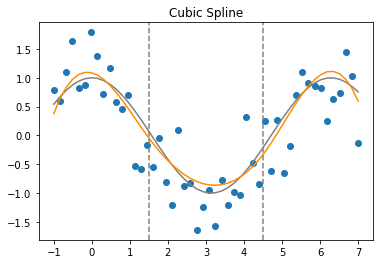

In [10]:
from scipy import linalg

# Construct H
h1 = scipy.ones_like(x_true)
h2 = scipy.copy(x_true)
h3 = h2 ** 2
h4 = h2 ** 3
h5 = scipy.where(x_true < x_knot_1, 0, (x_true - x_knot_1) ** 3)
h6 = scipy.where(x_true < x_knot_2, 0, (x_true - x_knot_2) ** 3)
H = scipy.vstack((h1, h2, h3, h4, h5, h6)).T

# Fit basis expansion via OLS
HH = H.T @ H
beta = linalg.solve(HH, H.T @ y_true)
y_hat = H @ beta

# Plot simulated data and cubic splie
plt.plot(x_true, y_obs, 'o')
plt.plot(x_true, y_true, color='gray')
plt.plot(x_true, y_hat, color='darkorange')
plt.title('Cubic Spline')

# Plot knots
plt.axvline(x=x_knot_1, c='gray', ls='--')
plt.axvline(x=x_knot_2, c='gray', ls='--')
             
plt.show()

The cubic spline above seems to fit well to the data. However, there is a danger associated with using this technique: the behaviour of cubic splines tends to be erratic near the boundaries, i.e. beyoned the obsevered values of $X$. To smooth the function near the boundaries, one can use a special kind of spline known as a **natural spline**.

A natural cubic spline adds additional constraints, namely that the function is linear beyond the boundary knots. There will be a price paid in bias near the boundaries for this rather crude approximation, but assuming linearity near the boundaries, where we have less information anyway, is often considered reasonable.

A natural cubic spline with $K$ knots is represented by $K$ basis functions as follows:

<p align="center">
<img src="img/natural_spline.png" width=400 height=400 style="display: block; margin: auto;" />
</p>

where

<p align="center">
<img src="img/natural_spline_where.png" width=250 height=400 style="display: block; margin: auto;" />
</p>

We will shortly apply all the discussed methods to a real-life data set, but before that let us look at another approach to obtaining splines.

# Smoothing Splines

<p align="center">
<img src="img/smoothing_spline.png" width=400 height=400 style="display: block; margin: auto;" />
</p>

# Practical Application

In [1]:
import statsmodels.api as sm

# Sources

1. Hastie, T., Tibshirani, R., & Friedman, J. H. (2009). The elements of statistical learning: data mining, inference, and prediction. 2nd ed. New York: Springer.
2. https://github.com/espdev/csaps